In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250

In [2]:
df = pd.read_csv(r"C:\Users\lenovo\OneDrive\Desktop\Daily needs\DS Assingments\PCA\PCA\wine.csv")
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


# Data Preprocessing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [5]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [6]:
df.isna().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [7]:
df.drop(columns = ['Type'], inplace = True) # because it is irrelavent to the model building

In [8]:
sc = StandardScaler() # here we calculate the distance so we have performed scaling operation

In [9]:
x = sc.fit_transform(df)

<Axes: >

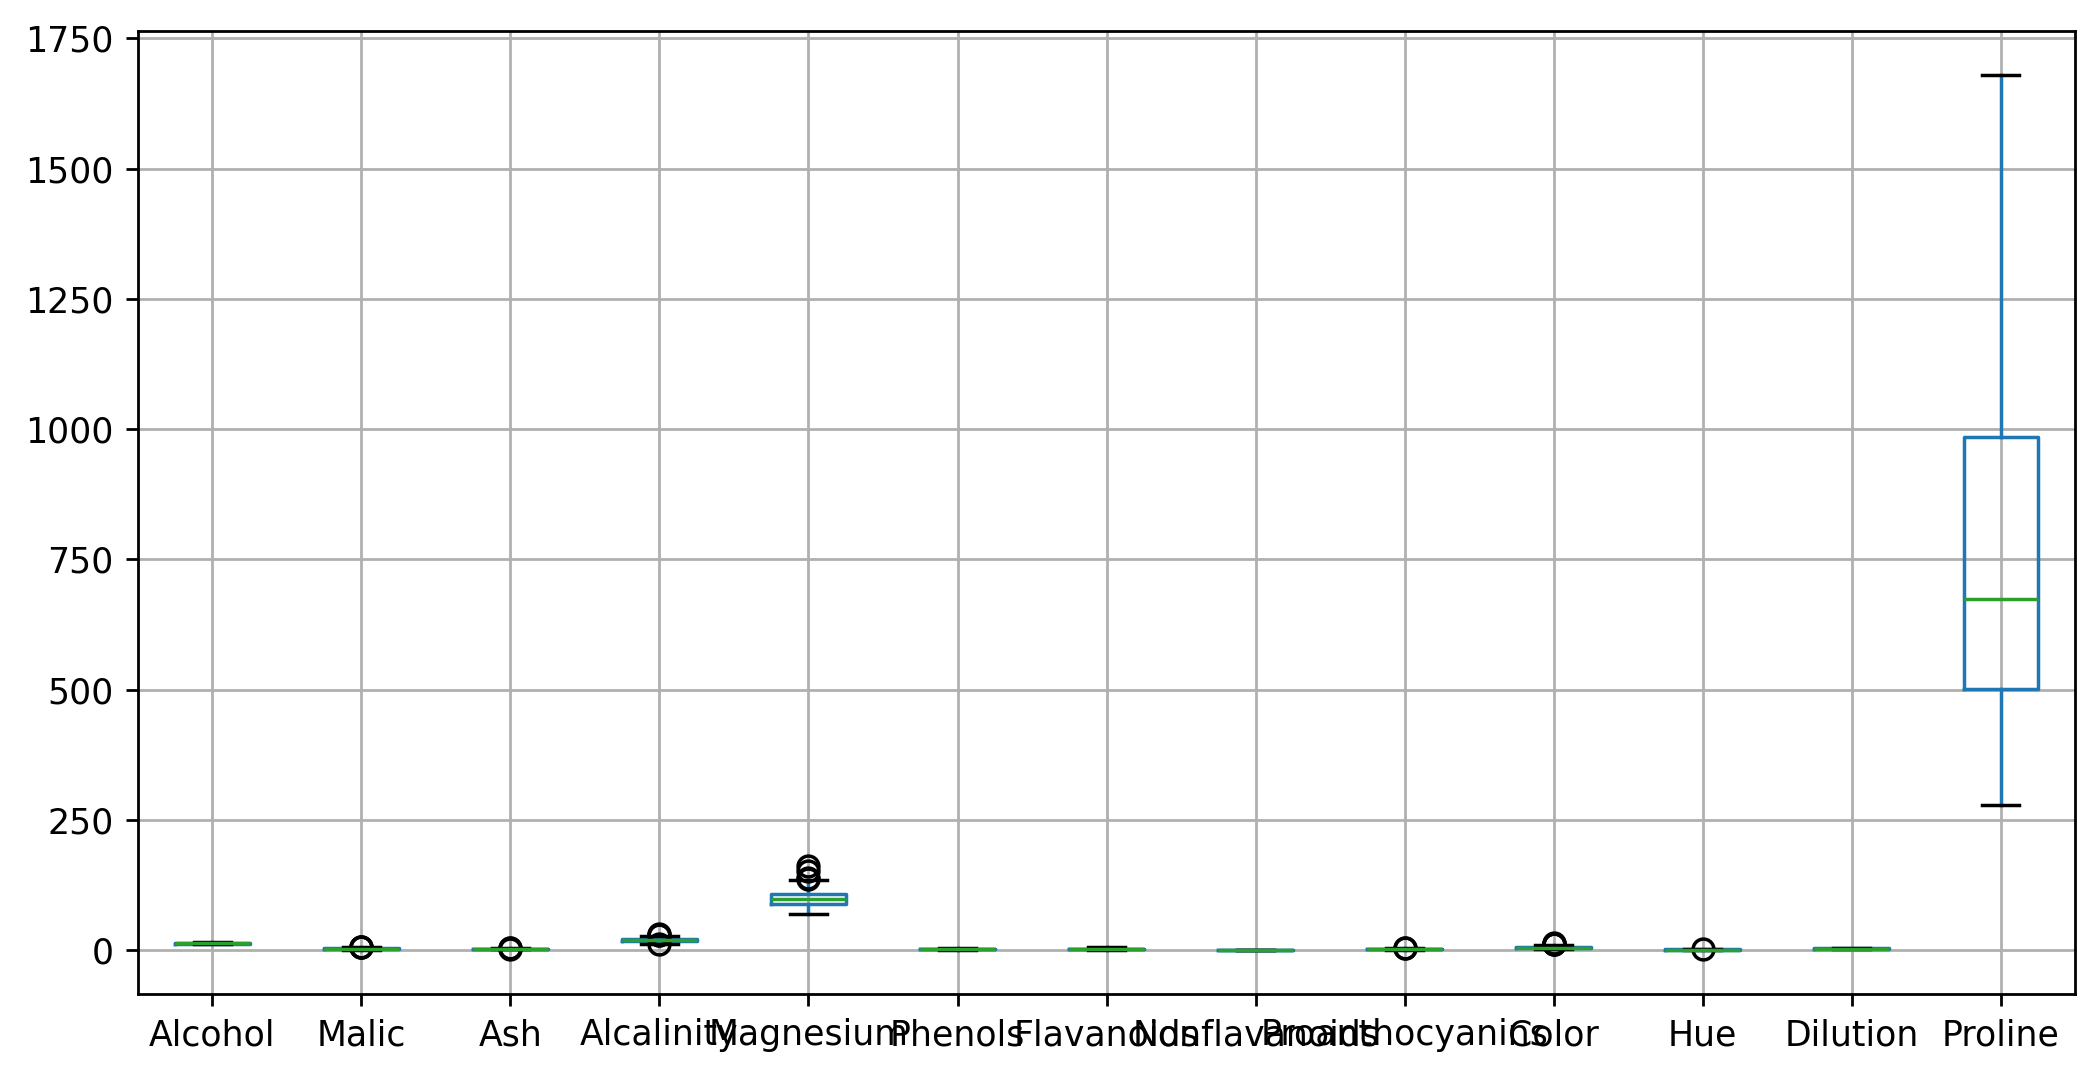

In [10]:
df.boxplot() # to check whether the outliers are present or not

In [11]:
def capping(data,columns):   # to handle outliers
    for col in columns:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - (1.5 * iqr)
        upper = q3 + (1.5 * iqr)

        df[col] = np.where(df[col] > upper,upper,np.where(df[col] < lower, lower, df[col]))

In [12]:
capping(df,df.columns)

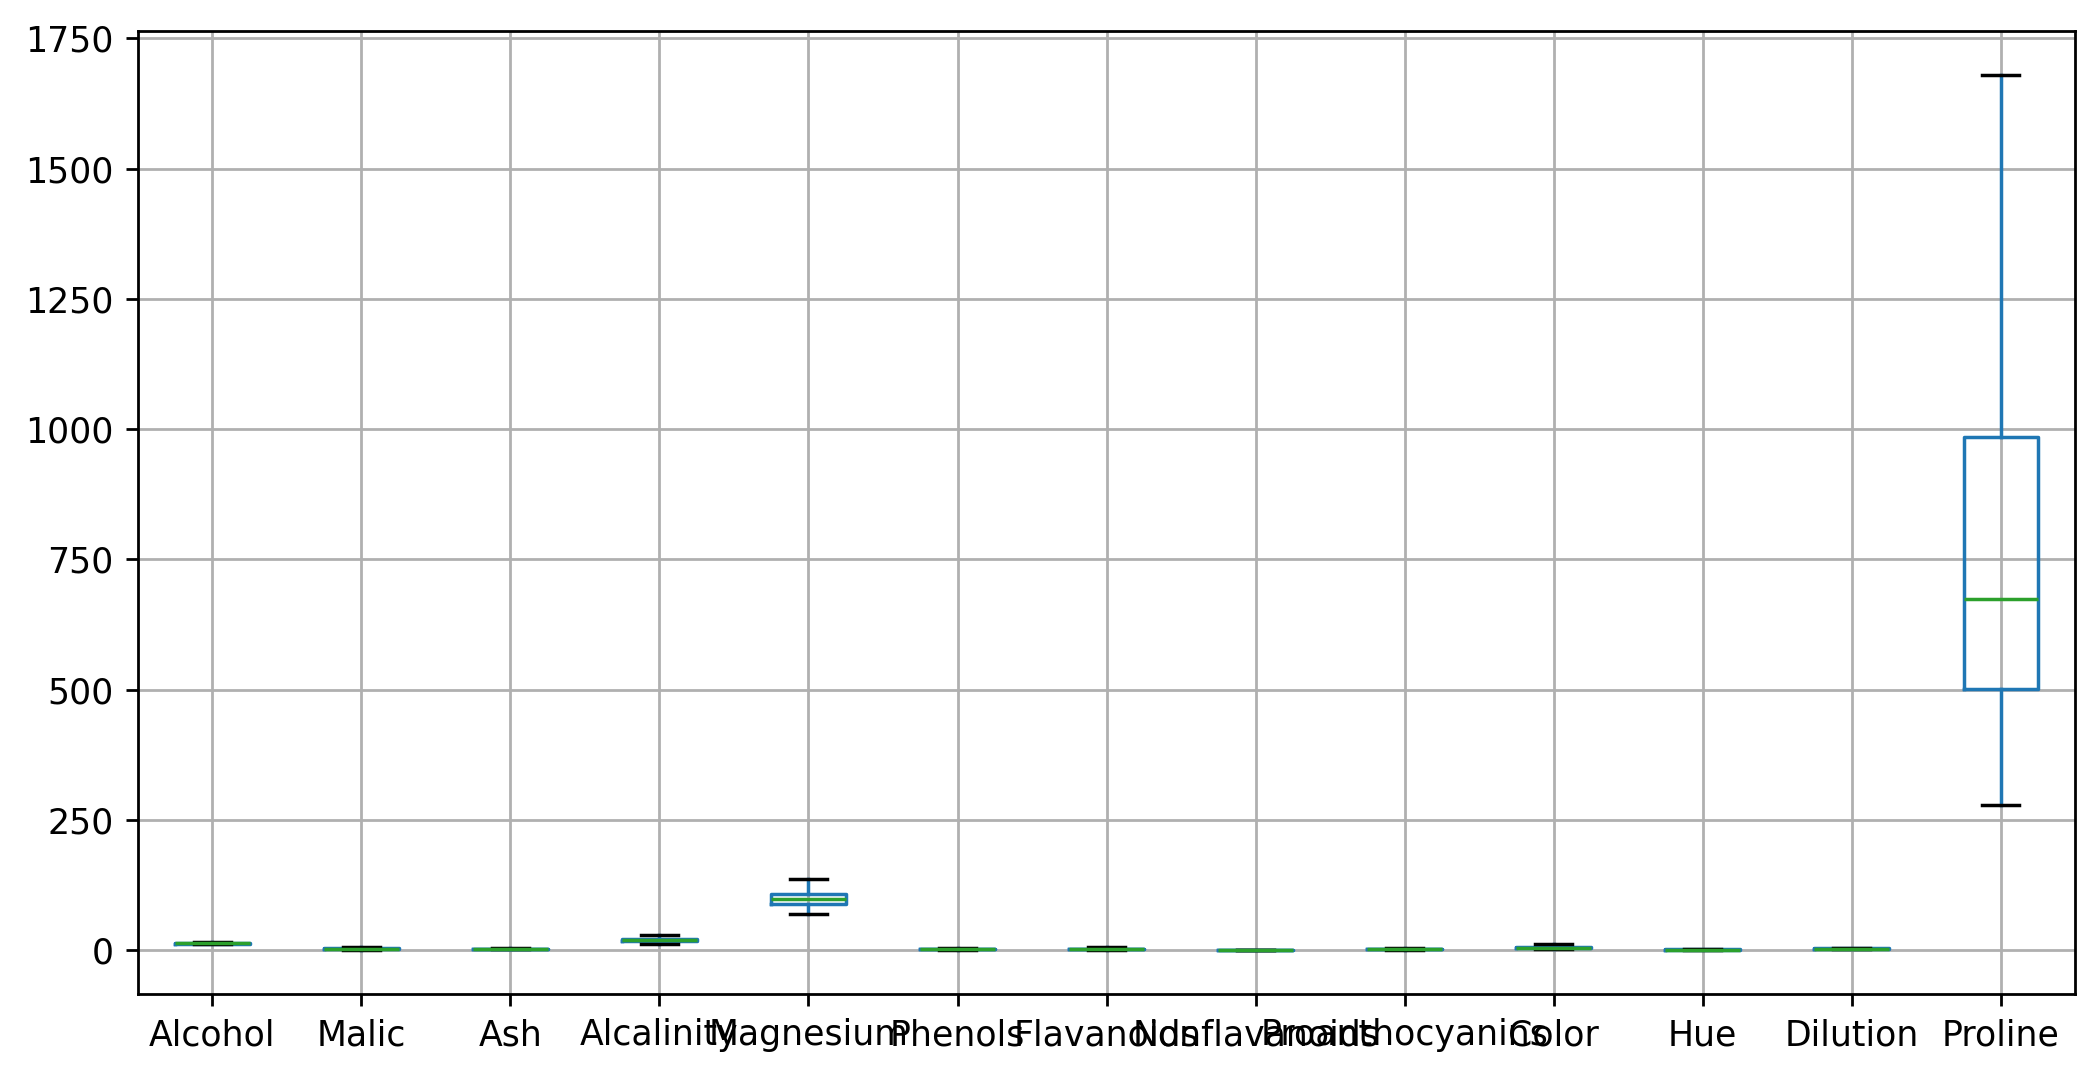

In [13]:
df.boxplot()
plt.show()

In [14]:
# here we try to find the correlation between the columns present 
df.corr(numeric_only = True)

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Alcohol,1.000000,0.094756,0.220174,-0.312191,0.302173,0.289101,0.236815,-0.155929,0.153171,0.549107,-0.067156,0.072343,0.643720
Malic,0.094756,1.000000,0.166614,0.295882,-0.039329,-0.339050,-0.414875,0.294203,-0.234575,0.264897,-0.566409,-0.372582,-0.191173
Ash,0.220174,0.166614,1.000000,0.427713,0.322510,0.124436,0.097562,0.183666,0.006080,0.256799,-0.075904,-0.011214,0.229676
Alcalinity,-0.312191,0.295882,0.427713,1.000000,-0.098030,-0.333046,-0.363405,0.369276,-0.208794,0.009748,-0.286664,-0.287032,-0.448700
Magnesium,0.302173,-0.039329,0.322510,-0.098030,1.000000,0.227035,0.209431,-0.255674,0.201428,0.240505,0.040007,0.064019,0.411557
Phenols,0.289101,-0.339050,0.124436,-0.333046,0.227035,1.000000,0.864564,-0.449935,0.618771,-0.062101,0.435952,0.699949,0.498115
Flavanoids,0.236815,-0.414875,0.097562,-0.363405,0.209431,0.864564,1.000000,-0.537900,0.665384,-0.169807,0.546718,0.787194,0.494193
Nonflavanoids,-0.155929,0.294203,0.183666,0.369276,-0.255674,-0.449935,-0.537900,1.000000,-0.368455,0.131596,-0.266995,-0.503270,-0.311385
Proanthocyanins,0.153171,-0.234575,0.006080,-0.208794,0.201428,0.618771,0.665384,-0.368455,1.000000,-0.032693,0.306289,0.530565,0.340562
Color,0.549107,0.264897,0.256799,0.009748,0.240505,-0.062101,-0.169807,0.131596,-0.032693,1.000000,-0.520416,-0.430638,0.327100


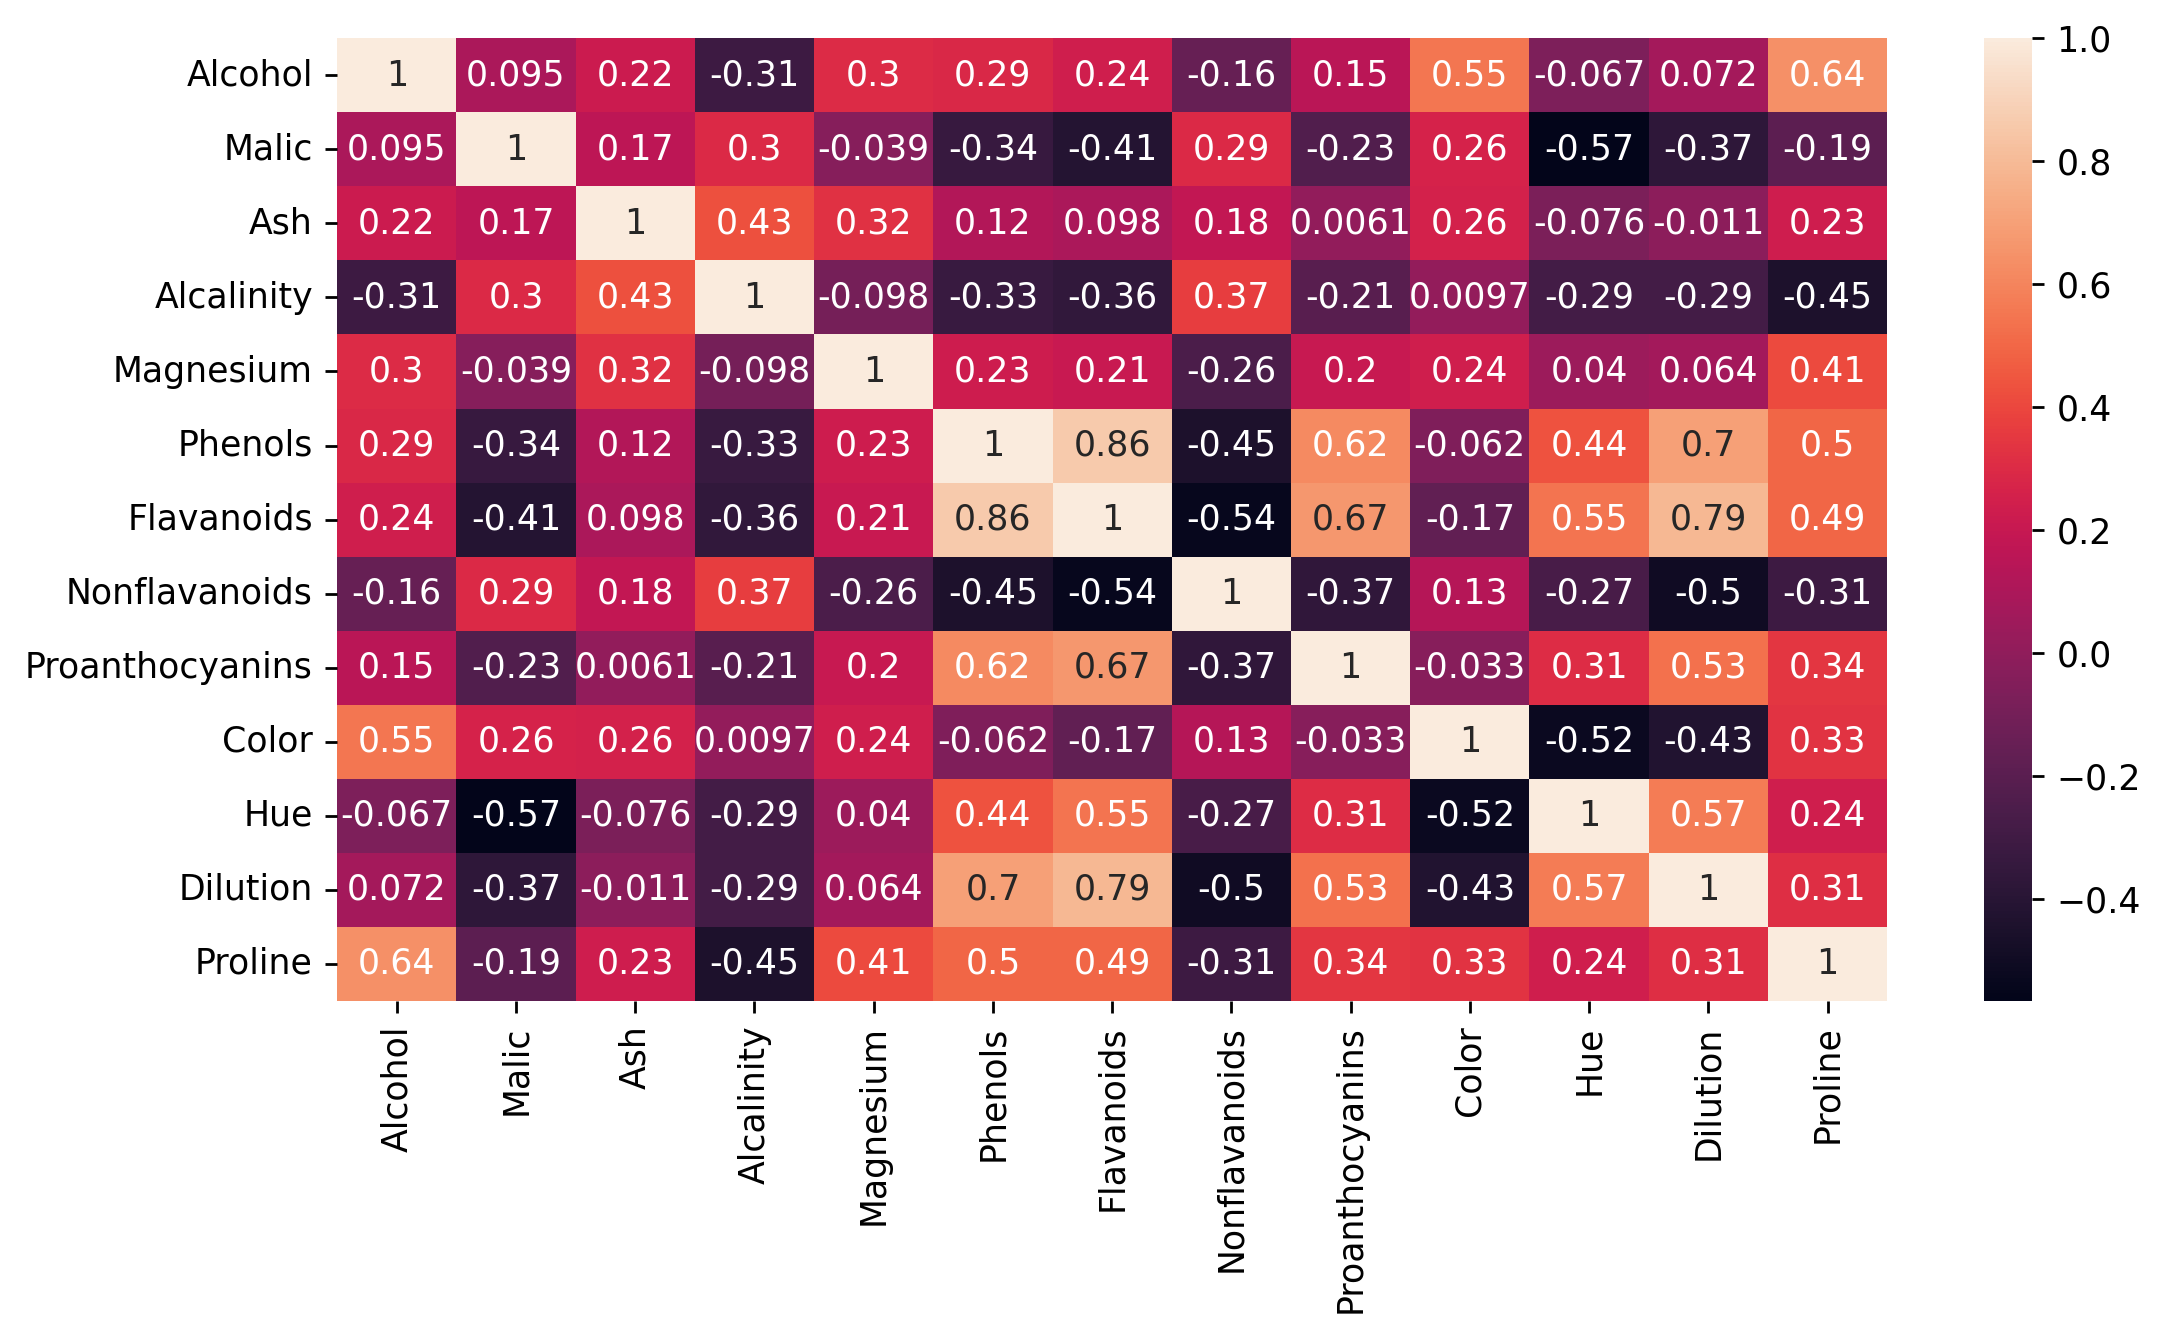

In [15]:
# heatmap to get better visuals regarding correlations
sns.heatmap(df.corr(numeric_only = True),annot = True)
plt.show()

# Dimensionality Reduction with PCA

In [17]:
pca = PCA(n_components = 2) # here we have choosen 2 principle component sampling
pcs = pca.fit_transform(x)

In [18]:
pcs

array([[ 3.31675081,  1.44346263],
       [ 2.20946492, -0.33339289],
       [ 2.51674015,  1.0311513 ],
       [ 3.75706561,  2.75637191],
       [ 1.00890849,  0.86983082],
       [ 3.05025392,  2.12240111],
       [ 2.44908967,  1.17485013],
       [ 2.05943687,  1.60896307],
       [ 2.5108743 ,  0.91807096],
       [ 2.75362819,  0.78943767],
       [ 3.47973668,  1.30233324],
       [ 1.7547529 ,  0.61197723],
       [ 2.11346234,  0.67570634],
       [ 3.45815682,  1.13062988],
       [ 4.31278391,  2.09597558],
       [ 2.3051882 ,  1.66255173],
       [ 2.17195527,  2.32730534],
       [ 1.89897118,  1.63136888],
       [ 3.54198508,  2.51834367],
       [ 2.0845222 ,  1.06113799],
       [ 3.12440254,  0.78689711],
       [ 1.08657007,  0.24174355],
       [ 2.53522408, -0.09184062],
       [ 1.64498834, -0.51627893],
       [ 1.76157587, -0.31714893],
       [ 0.9900791 ,  0.94066734],
       [ 1.77527763,  0.68617513],
       [ 1.23542396, -0.08980704],
       [ 2.18840633,

In [19]:
pd.DataFrame(pcs)

,0,1
0,3.316751,1.443463
1,2.209465,-0.333393
2,2.516740,1.031151
3,3.757066,2.756372
4,1.008908,0.869831
...,...,...
173,-3.370524,2.216289
174,-2.601956,1.757229
175,-2.677839,2.760899
176,-2.387017,2.297347


In [20]:
# explianed variance
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 ])

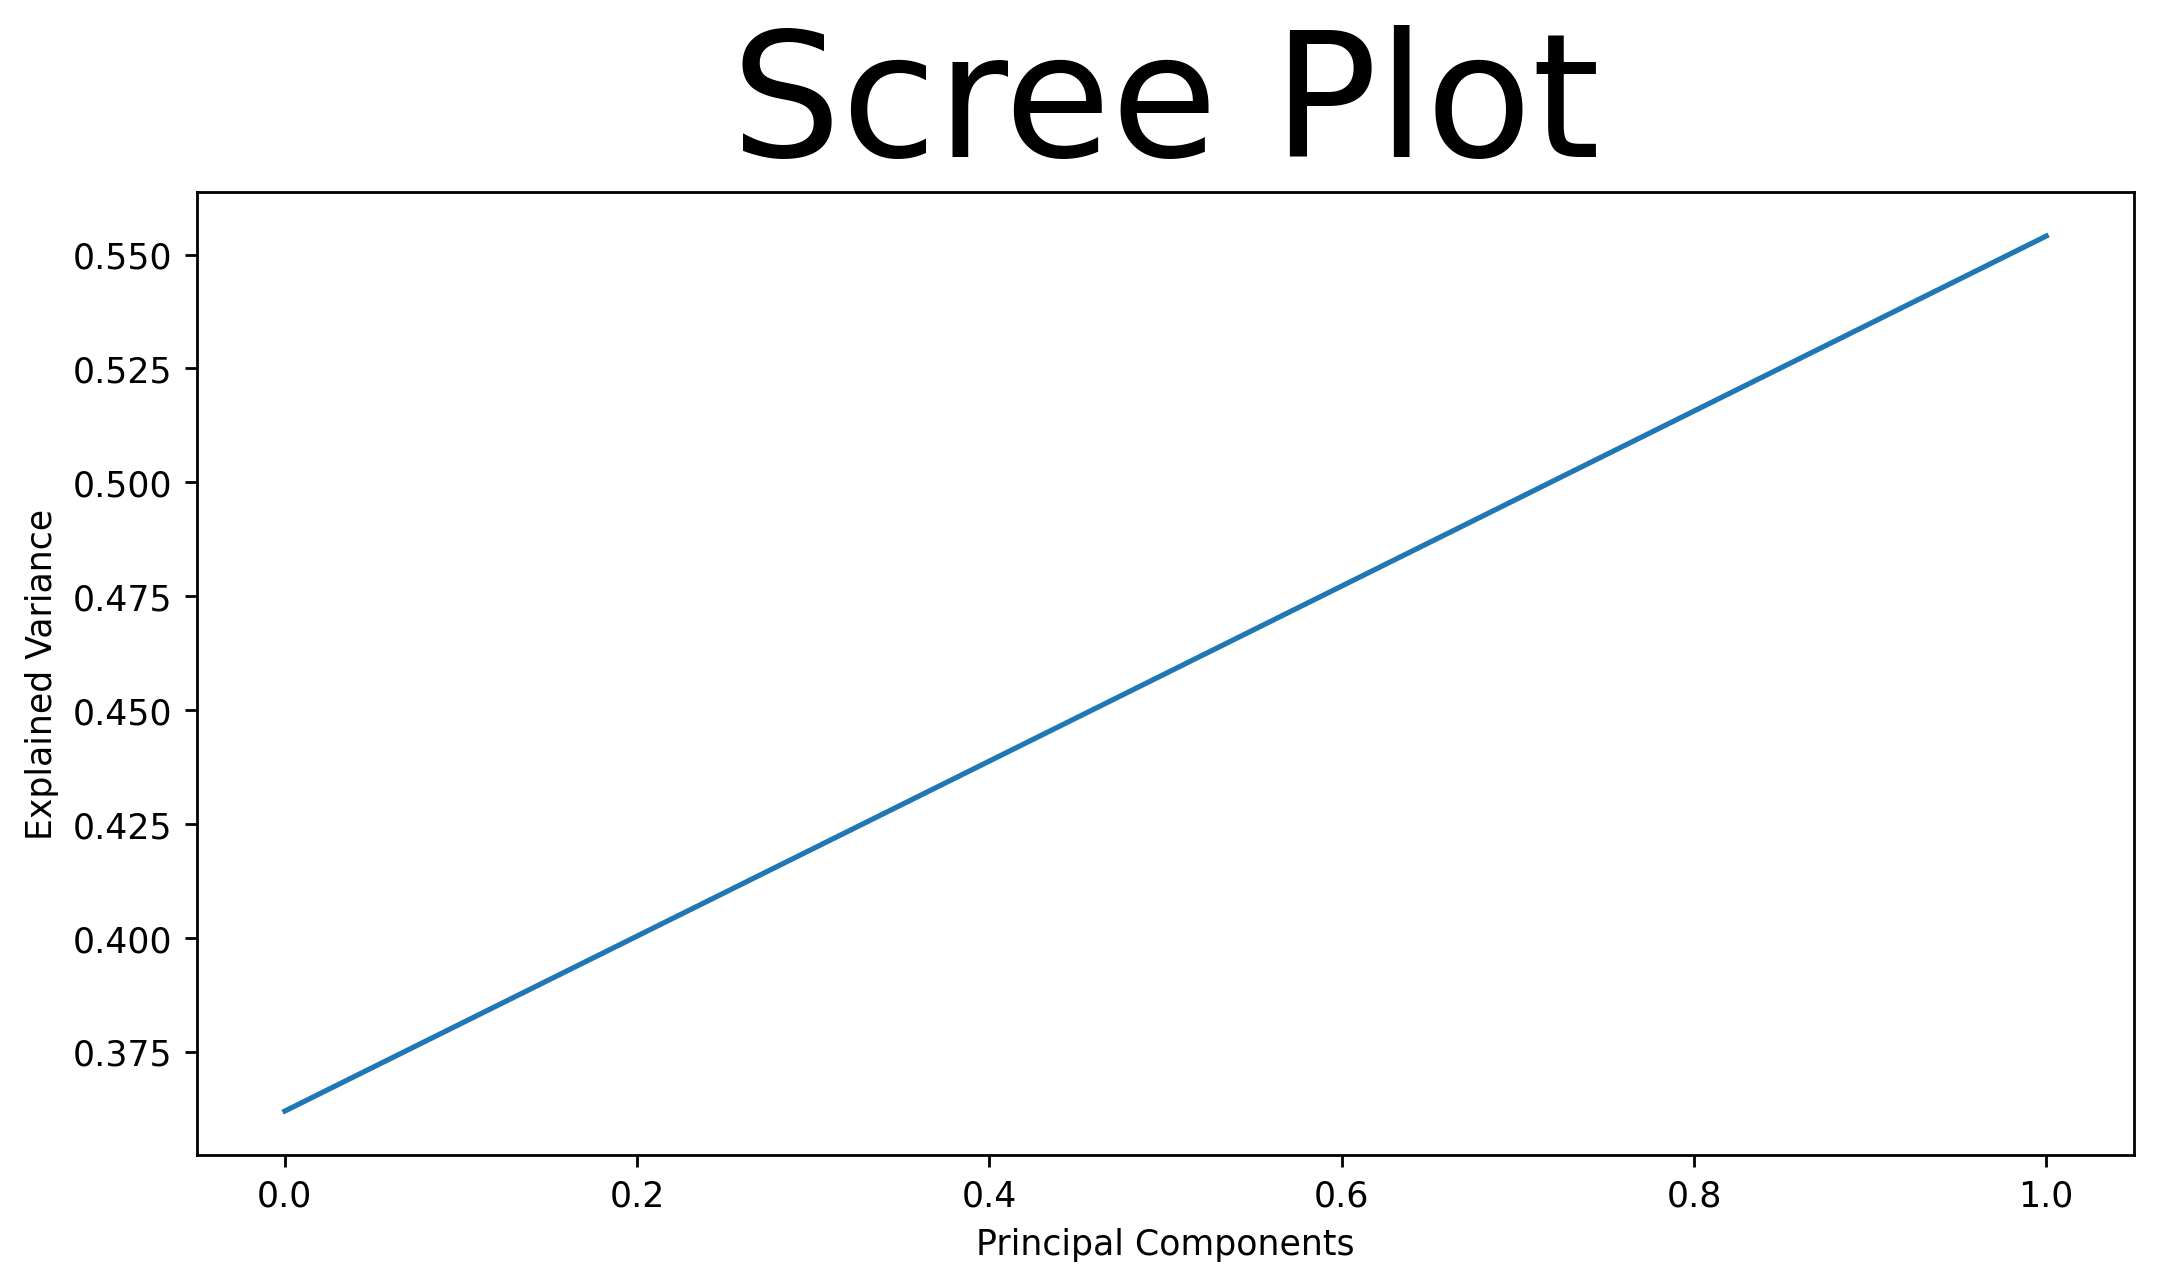

In [21]:
# Scree Plot
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.title('Scree Plot', size = 50)
plt.show()

# K-Means Clustering without PCA

In [23]:
from sklearn.cluster import KMeans

In [24]:
df1 = df

In [25]:
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters = i)
    km.fit_predict(x)
    wcss.append(km.inertia_)

In [26]:
wcss

[2314.0,
 1659.0079672511501,
 1279.731123104636,
 1190.8120027497655,
 1121.6067104707658,
 1064.0297833232378,
 1008.8128571839882,
 975.920899871585,
 945.9408660544584,
 891.9759841461064]

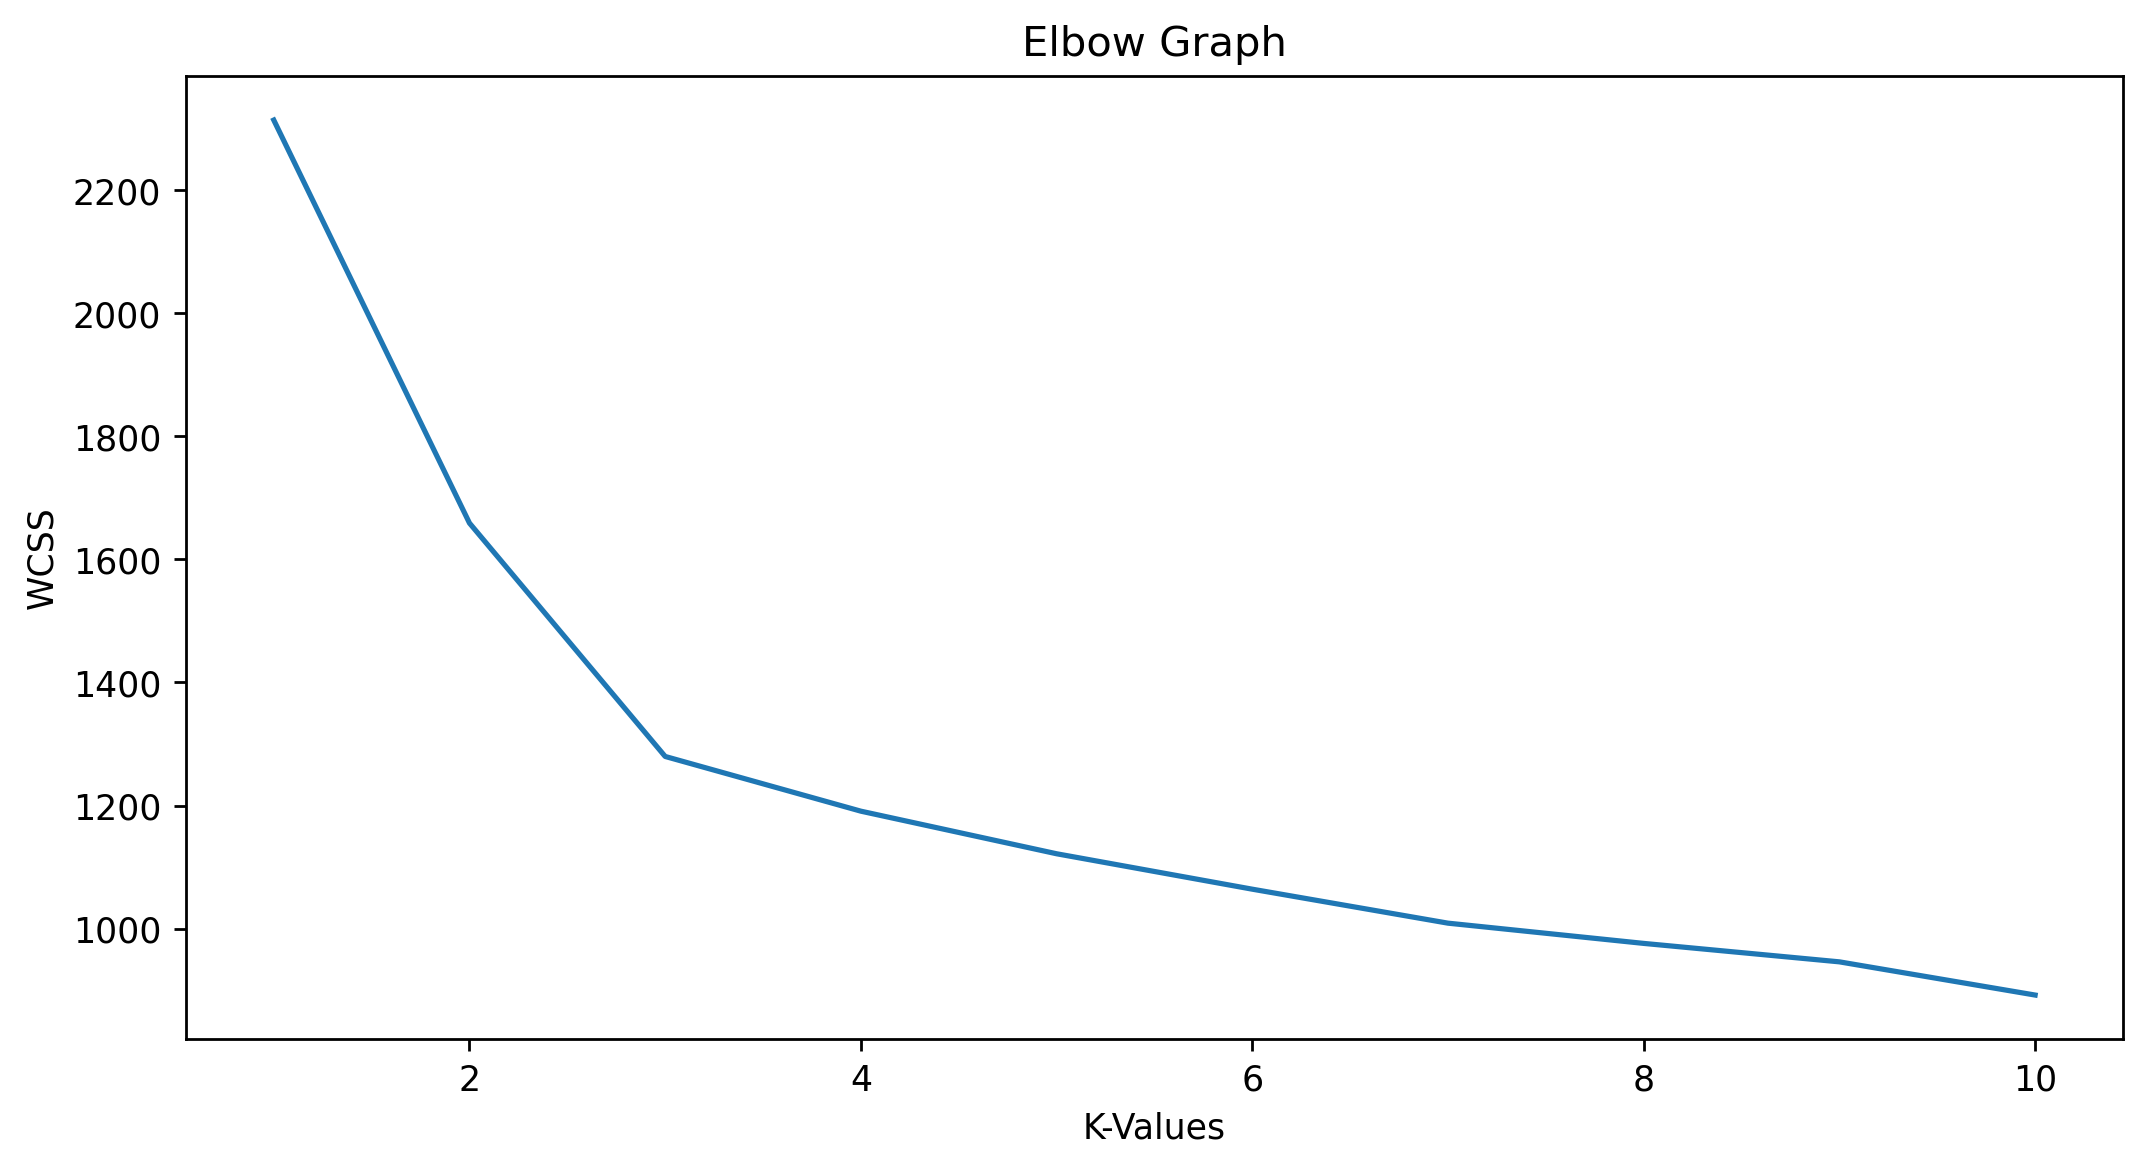

In [27]:
# Plotting Elbow graph to find n_clusters to be formed.
plt.plot(range(1,11),wcss)
plt.xlabel('K-Values')
plt.ylabel('WCSS')
plt.title('Elbow Graph')
plt.show()

In [28]:
km = KMeans(n_clusters=3)
labels_original = km.fit_predict(x)
labels_original

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [29]:
from sklearn.metrics import silhouette_score

In [30]:
df1['cluster'] = labels_original

In [31]:
# silhouette score
silhouette_score(x, labels_original) 

0.2844212860533542

In [32]:
df1['cluster'].value_counts()

cluster
0    64
2    63
1    51
Name: count, dtype: int64

In [33]:
# Cluster Evaluation

In [34]:
df1.groupby('cluster').agg('mean')

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
cluster,,,,,,,,,,,,,
0,12.239531,1.917227,2.261523,20.313281,91.562500,2.273906,2.112500,0.362969,1.587500,3.015625,1.055973,2.820781,502.468750
1,13.134118,3.296373,2.417647,21.241176,98.666667,1.683922,0.818824,0.451961,1.145882,7.165098,0.691961,1.696667,619.058824
2,13.665714,1.968254,2.432361,17.202381,108.190476,2.811429,2.924603,0.287778,1.940952,5.370952,1.070952,3.140000,1098.682540


# Kmeans Clustering With PCA

In [36]:
df2 = df.copy()

In [37]:
# Here we will take 2 principle component sampling
pca1 = PCA(n_components = 2)
pcs2 = pca.fit_transform(x)
pcs2

array([[ 3.31675081,  1.44346263],
       [ 2.20946492, -0.33339289],
       [ 2.51674015,  1.0311513 ],
       [ 3.75706561,  2.75637191],
       [ 1.00890849,  0.86983082],
       [ 3.05025392,  2.12240111],
       [ 2.44908967,  1.17485013],
       [ 2.05943687,  1.60896307],
       [ 2.5108743 ,  0.91807096],
       [ 2.75362819,  0.78943767],
       [ 3.47973668,  1.30233324],
       [ 1.7547529 ,  0.61197723],
       [ 2.11346234,  0.67570634],
       [ 3.45815682,  1.13062988],
       [ 4.31278391,  2.09597558],
       [ 2.3051882 ,  1.66255173],
       [ 2.17195527,  2.32730534],
       [ 1.89897118,  1.63136888],
       [ 3.54198508,  2.51834367],
       [ 2.0845222 ,  1.06113799],
       [ 3.12440254,  0.78689711],
       [ 1.08657007,  0.24174355],
       [ 2.53522408, -0.09184062],
       [ 1.64498834, -0.51627893],
       [ 1.76157587, -0.31714893],
       [ 0.9900791 ,  0.94066734],
       [ 1.77527763,  0.68617513],
       [ 1.23542396, -0.08980704],
       [ 2.18840633,

In [38]:
iner = []
for i in range(1,11):
    km = KMeans(n_clusters = i)
    km.fit_predict(pcs2)
    iner.append(km.inertia_)

In [39]:
iner

[1282.1026695794817,
 629.3609307352831,
 260.0166626835766,
 201.90887379245956,
 155.0692047489171,
 131.6655697625946,
 104.74429542713872,
 105.67953895788807,
 81.19027919537042,
 74.05467465128287]

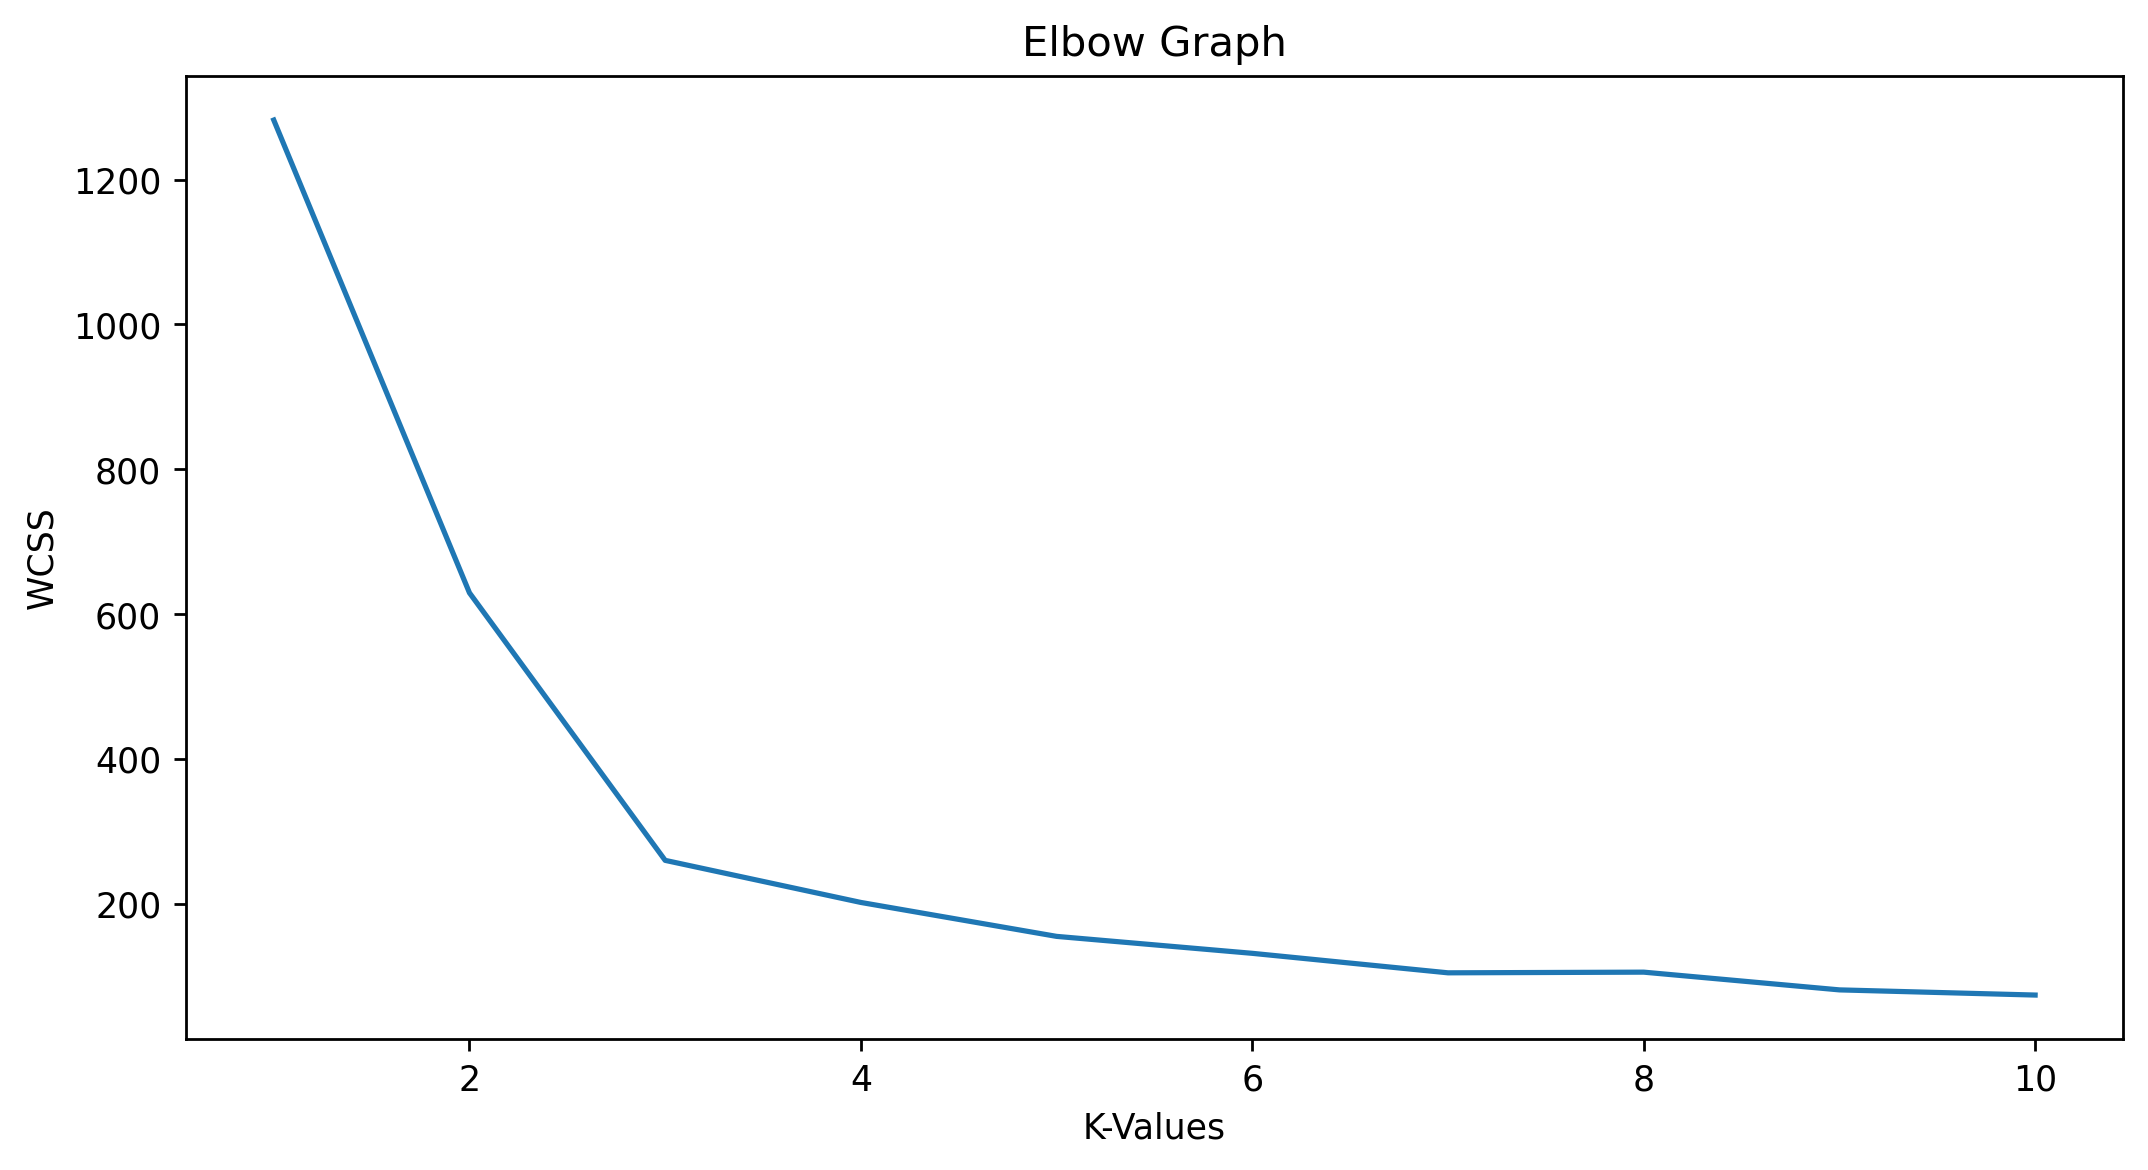

In [40]:
# Plotting Elbow graph to find n_clusters to be formed.
plt.plot(range(1,11),iner)
plt.xlabel('K-Values')
plt.ylabel('WCSS')
plt.title('Elbow Graph')
plt.show()

In [41]:
km = KMeans(n_clusters=3)
labels_pca = km.fit_predict(pcs2)
labels_pca

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [42]:
from sklearn.metrics import silhouette_score

In [43]:
df1['cluster'] = labels_pca

In [44]:
silhouette_score(pcs, labels_pca)  # Silhouette score

0.5609305721582905

In [45]:
df1['cluster'].value_counts()

cluster
0    67
1    62
2    49
Name: count, dtype: int64

In [46]:
# Cluster Evaluation

In [47]:
df1.groupby('cluster').agg('mean')

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
cluster,,,,,,,,,,,,,
0,13.592388,1.936119,2.438619,17.555224,107.611940,2.838060,2.956418,0.286269,1.934627,5.305373,1.071493,3.142836,1069.223881
1,12.241774,1.964073,2.235302,20.006452,91.064516,2.195968,2.000484,0.373226,1.543710,2.984839,1.047456,2.765968,492.887097
2,13.151633,3.333163,2.434694,21.438776,99.020408,1.678163,0.797959,0.450816,1.163061,7.270816,0.685918,1.690204,627.551020


In [48]:
# Compare original vs PCA-based clustering
comparison_df = pd.DataFrame({
    "Original_Cluster": labels_original,
    "PCA_Cluster": labels_pca
})
print(comparison_df.head())

   Original_Cluster  PCA_Cluster
0                 2            0
1                 2            0
2                 2            0
3                 2            0
4                 2            0


# Insights
- PCA retained ~80% variance with just 2-3 components.
- Clustering improved post-PCA.
- PCA is highly effective for high-dimensional, correlated data.
- Use PCA when:
-  Features are correlated
-  You need better performance or visualization
- Avoid PCA when:
-  Interpretability of individual features is critical



In [50]:
# By above we can say that earlier silhouetee score of original dataset was nearly about 29% 
# but after using PCA the silhouetee score of K-means model was changed to about 56% that is greater change in its performance